### Importing necessary libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Resizing the image

(900, 1200)


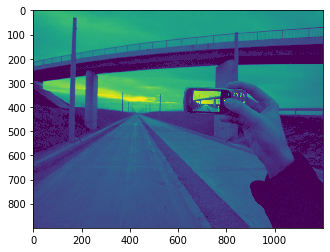

In [10]:
image = cv2.imread("images/sample1.png",0)
print(image.shape)
height,width=image.shape
plt.imshow(image)

(1800, 2400)


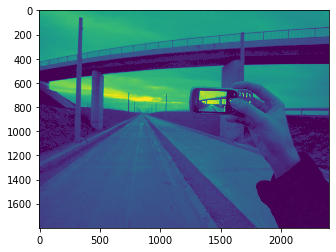

In [13]:
resized_img = cv2.resize(image,(width*2,height*2))
print(resized_img.shape)
plt.imshow(resized_img)

### Changing BGR to Grayscale

In [27]:
img=cv2.imread("images/sample2.jpg")
print("earlier shape::",img.shape)
# plt.imshow(img)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# print(rgb)
print("shape::",gray.shape)

earlier shape:: (3280, 4288, 3)
shape:: (3280, 4288)


### Segmenting the water region 

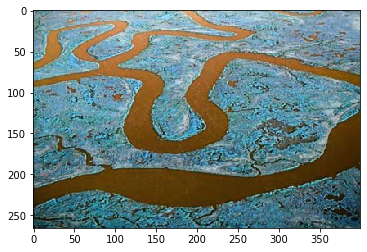

In [23]:
img=cv2.imread("images/watershed.jpg")
plt.imshow(img)

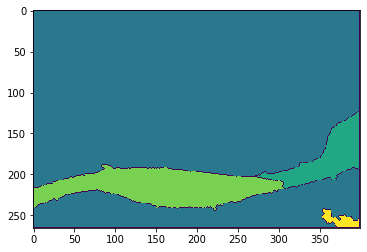

In [25]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# print("ret::",ret)
# print("thresh::",thresh)

kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.imshow(markers)
plt.show()

### Detecting edges

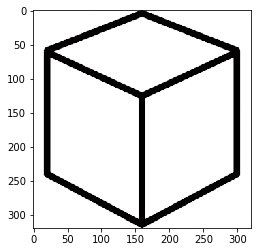

In [34]:
img=cv2.imread("images/edge.png")
plt.imshow(img)

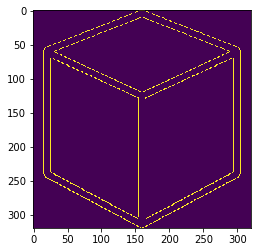

In [39]:
edges = cv2.Canny(img,50,50)
plt.imshow(edges)

### Eroding the image

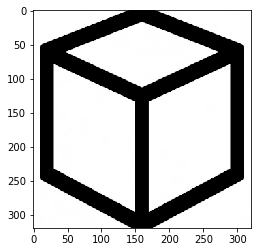

In [53]:
img=cv2.imread("images/edge.png")
img=cv2.erode(img, None, iterations=5)
plt.imshow(img)

### Dilating the image

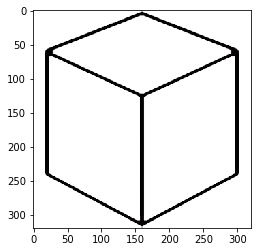

In [55]:
img=cv2.imread("images/edge.png")
img=cv2.dilate(img, None, iterations=2)
plt.imshow(img)

### Blurring the image

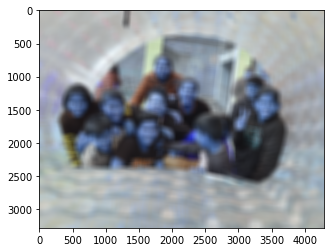

In [46]:
img=cv2.imread("images/sample2.jpg")
blurred=cv2.blur(img,(100,100))
plt.imshow(blurred)

### Using Gaussian Blur Filter

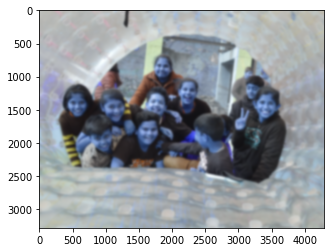

In [75]:
img=cv2.imread("images/sample2.jpg")
img = cv2.GaussianBlur(img, (101, 101), 0)
plt.imshow(img)

### Using Median Blur Filter

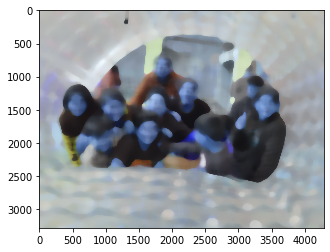

In [80]:
img=cv2.imread("images/sample2.jpg")
img = cv2.medianBlur(img, 101)
plt.imshow(img)

### Using Bilateral Filter

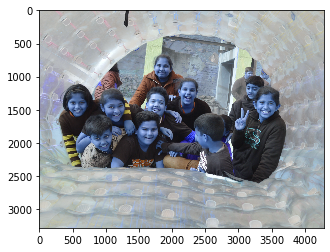

In [5]:
img=cv2.imread("images/sample2.jpg")
img = cv2.bilateralFilter(img, 9,75,75)
plt.imshow(img)